In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./output/data_cleaned.csv", index_col="Rank")

In [5]:
df.head()

,Mark,Competitor,DOB,Nat,Pos,Venue,Date,Age at race,Current age
Rank,,,,,,,,,
0,2:01:39,Eliud KIPCHOGE,1984-11-05,KEN,1,Berlin (GER),2018-09-16,33,36
1,2:01:41,Kenenisa BEKELE,1982-06-13,ETH,1,Berlin (GER),2019-09-29,37,38
2,2:02:37,Eliud KIPCHOGE,1984-11-05,KEN,1,London (GBR),2019-04-28,34,36
3,2:02:48,Birhanu LEGESE,1994-09-11,ETH,2,Berlin (GER),2019-09-29,25,26
4,2:02:55,Mosinet GEREMEW,1992-02-12,ETH,2,London (GBR),2019-04-28,27,28


In [9]:
#### ANALYSIS ####

import matplotlib.pyplot as plt
import seaborn as sns

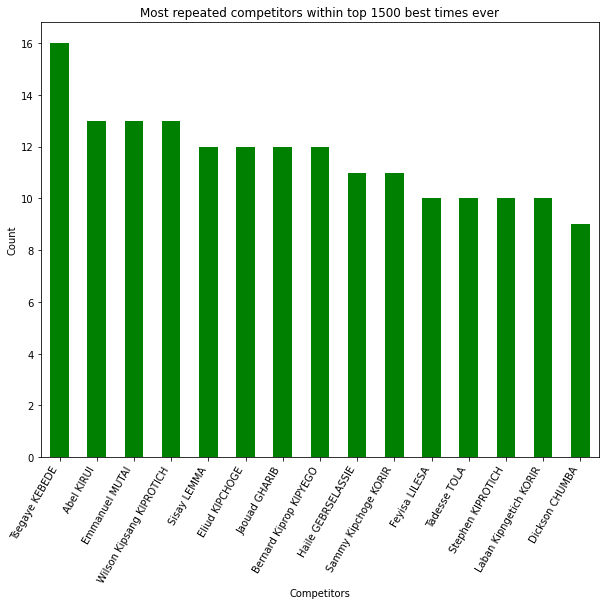

In [108]:
# Mostrar el top 15 de atletas que más veces aparecen en este dataset de mejores tiempos.
plt.figure(figsize=(10, 8))

df["Competitor"].value_counts().head(15).plot.bar(color = "green");
plt.xticks(rotation=60,ha='right');

plt.title("Most repeated competitors within top 1500 best times ever");
plt.xlabel('Competitors');
plt.ylabel('Count');


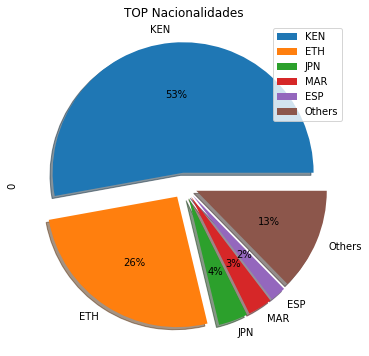

In [49]:
# Top 5 de nacionalidades de los competidores.

top_countries = df["Nat"].value_counts()
dict_countries= dict(top_countries)

other_countries= 0
dict_top_countries={}
for k,v in dict_countries.items():
    if v<29:
        other_countries+=v
    else:
        dict_top_countries[k] = v

# Añadimos una nueva entrada en el diccionario llamada "Others", cuyo value es la variable
# other countries que corresponde a la suma de todas las nacionalidades cuyos values en 
# el diccionario dict_countries es menor que 29 (Estos values son igual al numero total de
# apariciones en el dataset inicial).

dict_top_countries["Others"] = other_countries

df_top_countries = pd.DataFrame.from_dict(dict_top_countries, orient='index')

df_top_countries.head(6).plot.pie(autopct='%1.0f%%',explode=[0.1]*6, shadow=True, subplots=True,  figsize=[10,6])
plt.title("TOP Nacionalidades");

plt.savefig("top_nationalities_pie_chart.png")

#ESPAÑA EN EL TOP 5!! POCA BROMA. Los franceses perdiendo, again.

In [48]:
top_10 = df["Venue"].value_counts().iloc[:10]
top_10

London (GBR)         136
Amsterdam (NED)      112
Dubai (UAE)           88
Paris (FRA)           88
Berlin (GER)          86
Chicago, IL (USA)     84
Seoul (KOR)           84
Tokyo (JPN)           83
Rotterdam (NED)       81
Valencia (ESP)        63
Name: Venue, dtype: int64

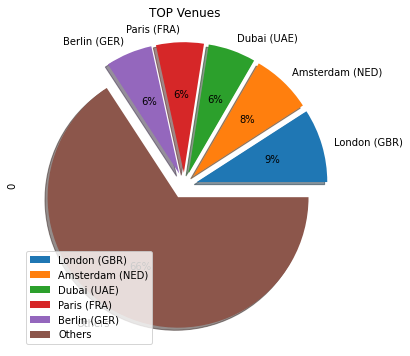

In [58]:
# Pie chart del top 5 venues(Berlin, Londres, etc)

#### Filtrar por las ciudades a partir del año 2000?

top_venues = df["Venue"].value_counts()
dict_venues= dict(top_venues)

other_cities= 0
dict_top_venues={}
for k,v in dict_venues.items():
    if v<85:
        other_cities+=v
    else:
        dict_top_venues[k] = v

# Añadimos una nueva entrada en el diccionario llamada "Others", cuyo value es la variable
# other cities que corresponde a la suma de todas las ciudades cuyos values en 
# el diccionario dict_cities es menor que 85 (Estos values son igual al numero total de
# apariciones en el dataset inicial).

dict_top_venues["Others"] = other_cities

dict_top_venues = pd.DataFrame.from_dict(dict_top_venues, orient='index')

dict_top_venues.head(6).plot.pie(autopct='%1.0f%%',explode=[0.1]*6, shadow=True, subplots=True,  figsize=[10,6])
plt.title("TOP Venues");
plt.savefig("top_cities_pie_chart.png")

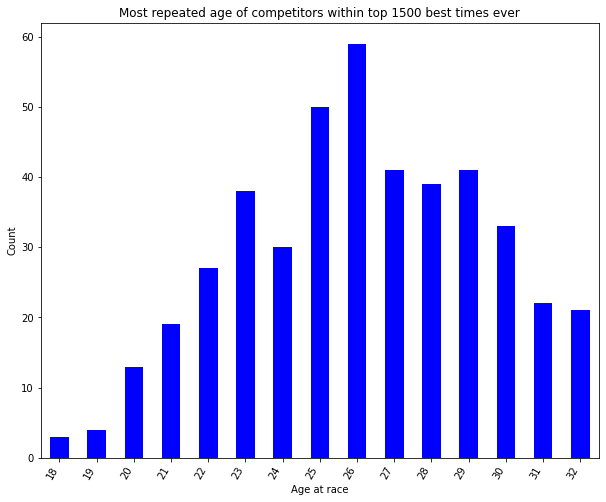

In [79]:
# Hist Plot "Age at race" para determinar la edad ideal para batir tiempos.
#### Mostrar la edad de los 500 mejores tiempos en lugar de los 1500?

ages= sorted(list(df["Age at race"].unique()))

plt.figure(figsize=(10, 8))

df["Age at race"].head(500).value_counts(sort=False).head(15).plot.bar(color = "blue");
plt.xticks(rotation=60,ha='right');

plt.title("Most repeated age of competitors within top 1500 best times ever");
plt.xlabel('Age at race');
plt.ylabel('Count');

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Text' object has no attribute 'set_xticklabels'

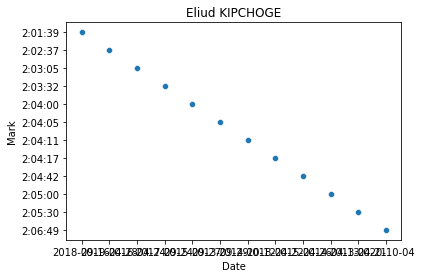

In [82]:
# grafica mostrando el progreso del top 5 atletas con mejor tiempo? 
# mostrando como ha ido mejorando/empeorando el tiempo de todas sus carreras 
# a lo largo del tiempo.

# Columna Mark: Muestra los tiempos de cada carrera(Mark deberia estar en el eje Y)
# Columna Date: Muestra la fecha de cada carrera (Date deberia estar en el eje X, aunque
# solo mostraría fechas concretas, en lugar de una progresión de años)
y= df[df["Competitor"]== "Eliud KIPCHOGE"]["Mark"]
x= df[df["Competitor"]== "Eliud KIPCHOGE"]["Date"]
g=sns.scatterplot(x,y).set_title('Eliud KIPCHOGE');
g.set_xticklabels(rotation=60)